[ 0.08        0.08000868  0.0800347  ...,  0.0800347   0.08000868  0.08      ]


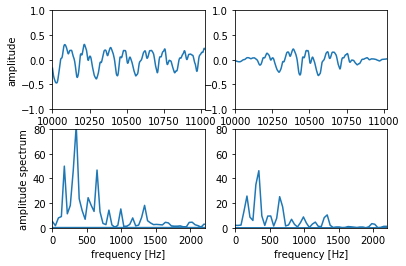

In [1]:
#coding:utf-8
import wave
import numpy as np
import scipy.fftpack
from pylab import *

if __name__ == "__main__":
    wf = wave.open("./piano/4.wav", "r")
    fs = wf.getframerate()  # サンプリング周波数
    x = wf.readframes(wf.getnframes())
    x = frombuffer(x, dtype="int16") / 32768.0  # 0-1に正規化
    channels = wf.getnchannels()
    x = x[::channels]
    
    start = 10000   # サンプリングする開始位置
    N = 1024     # FFTのサンプル数

    hammingWindow = np.hamming(N)    # ハミング窓
    print(hammingWindow)
#     hanningWindow = np.hanning(N)    # ハニング窓
#     blackmanWindow = np.blackman(N)  # ブラックマン窓
#     bartlettWindow = np.bartlett(N)  # バートレット窓

    originalData = x[start:start+N]                  # 切り出した波形データ（窓関数なし）
    windowedData = hammingWindow * x[start:start+N]  # 切り出した波形データ（窓関数あり）

    originalDFT = np.fft.fft(originalData)
    windowedDFT = np.fft.fft(windowedData)
    freqList = np.fft.fftfreq(N, d=1.0/fs)

    originalAmp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in originalDFT]
    windowedAmp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in windowedDFT]

    # 波形を描画（窓関数なし）
    subplot(221)  # 2行2列のグラフの1番目の位置にプロット
    plot(range(start, start+N), originalData)
    axis([start, start+N, -1.0, 1.0])
    xlabel("time [sample]")
    ylabel("amplitude")

    # 波形を描画（窓関数あり）
    subplot(222)  # 2行2列のグラフの2番目の位置にプロット
    plot(range(start, start+N), windowedData)
    axis([start, start+N, -1.0, 1.0])
    xlabel("time [sample]")

    # 振幅スペクトルを描画（窓関数なし）
    subplot(223)
    plot(freqList, originalAmp)
    axis([0, fs/20, 0, 80])
    xlabel("frequency [Hz]")
    ylabel("amplitude spectrum")

    # 振幅スペクトルを描画（窓関数あり）
    subplot(224)
    plot(freqList, windowedAmp)
    axis([0, fs/20, 0, 80])
    xlabel("frequency [Hz]")

    show()